In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1" #model will be trained on GPU 1

In [2]:
#!pip install seaborn
import seaborn as sns

In [3]:
import os
import cv2
import tensorflow.keras as keras 
#from tensorflow.keras.layers import Input,Dense,Flatten,Dropout,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
#from tensorflow.keras.layers.normalization import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
#from keras.optimizers import Adadelta, RMSprop,SGD,Adam
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K

In [4]:
import numpy as np
import scipy.misc
import numpy.random as rng
from PIL import Image, ImageDraw, ImageFont
from sklearn.utils import shuffle
#!pip install nibabel
import nibabel as nib #reading MR images
from sklearn.model_selection import train_test_split
import math
import glob
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
ff = glob.glob('E:/Gm_yes_new/*')

In [6]:
len(ff)

330

In [7]:
gg = glob.glob('E:/Gm_no_new/*')

In [8]:
len(gg)

299

In [9]:
list=ff+gg

In [10]:
len(list)

629

In [11]:
new_list = np.asarray(list)

In [12]:
images = []
Y=[]
for f in range(len(ff)):
    a = nib.load(ff[f])
    a = a.get_data()
    a = a[:,78:129,:]
    for i in range(a.shape[1]):
        Y.append("Yes")
        images.append((a[:,i,:]))
print (a.shape)

C:\Users\Dell\anaconda3\envs\labelme\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """
C:\Users\Dell\anaconda3\envs\labelme\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """
C:\Users\Dell\anaconda3\envs\labelme\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data

(121, 51, 121)


C:\Users\Dell\anaconda3\envs\labelme\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """
C:\Users\Dell\anaconda3\envs\labelme\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """


In [13]:
len(Y)

16830

In [14]:
#images = np.asarray(images)

In [15]:
len(images)

16830

In [16]:
print(images[0].shape)

(121, 121)


In [17]:
images1 = []
Y1=[]
for f in range(len(gg)):
    a = nib.load(gg[f])
    a = a.get_data()
    a = a[:,78:129,:]
    for i in range(a.shape[1]):
        Y1.append("No")
        images1.append((a[:,i,:]))
print (a.shape)

C:\Users\Dell\anaconda3\envs\labelme\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """
C:\Users\Dell\anaconda3\envs\labelme\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """
C:\Users\Dell\anaconda3\envs\labelme\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data

(121, 51, 121)


C:\Users\Dell\anaconda3\envs\labelme\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """


In [18]:
print(a.shape)

(121, 51, 121)


In [19]:
len(images1)

15249

In [20]:
len(Y1)

15249

In [21]:
Y1[0]

'No'

In [22]:
images_new=images+images1

In [23]:
len(images_new)

32079

In [24]:
images[5444]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
Y_new=Y+Y1

In [26]:
len(Y_new)

32079

In [27]:
images_new = np.asarray(images_new)

In [28]:
images_new.shape #dimension of each image is 121x121

(32079, 121, 121)

In [29]:
images_new = images_new.reshape(-1, 121,121,1)

In [30]:
images_new.shape #preprocessing by converting each image into a matrix of size 121X121X1

(32079, 121, 121, 1)

In [31]:
m = np.max(images_new) #rescaling using max-min normalization
mi = np.min(images_new)

In [32]:
m, mi

(1.0000000591389835, 0.0)

In [33]:
images_new = (images_new - mi) / (m - mi)

In [34]:
np.min(images_new), np.max(images_new) #o/p has to be 0.0, 1.0

(0.0, 1.0)

In [35]:
temp = np.zeros([32079,124,124,1])

In [36]:
temp[:,3:,3:,:] = images_new

In [37]:
images_new = temp

In [38]:
#Y_new=np.array(Y_new)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(images_new, Y_new, test_size=0.1, random_state=13)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (124, 124, 1)
Shape of an image in X_test:  (124, 124, 1)


In [40]:
from sklearn import preprocessing
import tensorflow as tf
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test) 

In [41]:
print("X_train Shape: ", X_train.shape) 
print("X_test Shape: ", X_test.shape) 
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

X_train Shape:  (28871, 124, 124, 1)
X_test Shape:  (3208, 124, 124, 1)
y_train Shape:  (28871, 2)
y_test Shape:  (3208, 2)


In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD,RMSprop
# Initialising the CNN
model = Sequential()# Convolution
model.add(BatchNormalization(input_shape = (124,124,1)))
model.add(Convolution2D(32, (3, 3), input_shape = (124, 124, 1), activation = 'relu'))# Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))# Convolution
model.add(Convolution2D(32, (3, 3), input_shape = (124, 124, 1), activation = 'relu'))# Flattening
model.add(Flatten())# Full connection
model.add(Dense(units = 256, activation = 'relu'))# Add Dropout to prevent overfitting
model.add(Dropout(0.5))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 2, activation = 'softmax'))# Compiling the CNN



In [55]:
#opt = SGD(lr=0.001, momentum=0.99, decay=0.01)
opt=RMSprop(lr=0.0001, rho=0.9, epsilon=1e-08, decay=0.001)
#m1.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
#optimizer='rmsprop
model.compile(loss='binary_crossentropy',
                    optimizer=opt,
                    metrics=['accuracy'])

C:\Users\Dell\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [42]:
#X_train = X_train.reshape(-1, 124, 124, 1)

In [43]:
#X_test = X_test.reshape(-1, 124, 124, 1)

In [56]:
history = model.fit(X_train,y_train,
                    epochs=15, 
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)

Epoch 1/15
903/903 [==============================] - 315s 348ms/step - loss: 0.6891 - accuracy: 0.5395 - val_loss: 0.6679 - val_accuracy: 0.5979
Epoch 2/15
903/903 [==============================] - 308s 341ms/step - loss: 0.6206 - accuracy: 0.6605 - val_loss: 0.5623 - val_accuracy: 0.7085
Epoch 3/15
903/903 [==============================] - 281s 311ms/step - loss: 0.5328 - accuracy: 0.7325 - val_loss: 0.5266 - val_accuracy: 0.7248
Epoch 4/15
903/903 [==============================] - 282s 312ms/step - loss: 0.4713 - accuracy: 0.7711 - val_loss: 0.4767 - val_accuracy: 0.7600
Epoch 5/15
903/903 [==============================] - 281s 311ms/step - loss: 0.4276 - accuracy: 0.7993 - val_loss: 0.4691 - val_accuracy: 0.7690
Epoch 6/15
903/903 [==============================] - 272s 301ms/step - loss: 0.3934 - accuracy: 0.8135 - val_loss: 0.4370 - val_accuracy: 0.7818
Epoch 7/15
903/903 [==============================] - 273s 303ms/step - loss: 0.3658 - accuracy: 0.8315 - val_loss: 0.4262 -

In [58]:
model.save("model_detect.tf")
print("Saved model to disk")

INFO:tensorflow:Assets written to: model_detect.tf\assets
Saved model to disk


In [72]:
model.save("model_detect.h5")
print("Saved model to disk")

Saved model to disk


In [42]:
from tensorflow.keras.models import load_model

model1 = load_model('model_detect.h5')
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 124, 124, 1)       4         
_________________________________________________________________
conv2d (Conv2D)              (None, 122, 122, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 59, 59, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 111392)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               28516608  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 124, 124, 1)       4         
_________________________________________________________________
conv2d (Conv2D)              (None, 122, 122, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 59, 59, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 111392)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               28516608  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

In [45]:
from tensorflow.keras.models import load_model

model = load_model('model_detect.tf')

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 124, 124, 1)       4         
_________________________________________________________________
conv2d (Conv2D)              (None, 122, 122, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 59, 59, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 111392)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               28516608  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

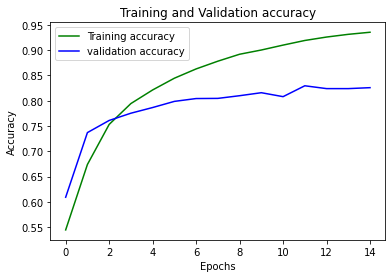

In [44]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,15)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

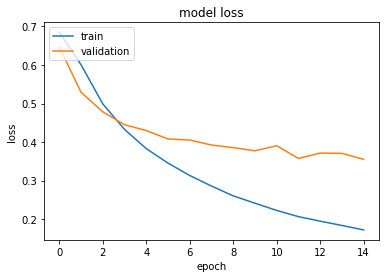

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

C:\Users\Dell\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


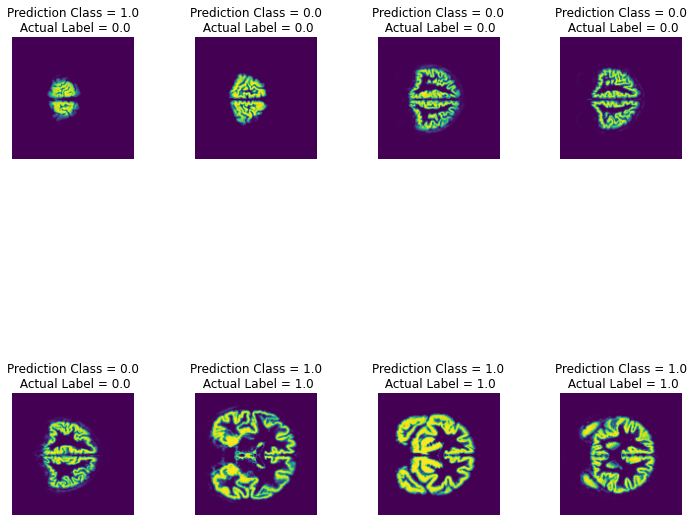

In [44]:
y_predicted=model.predict_classes(X_test)
y_actual=np.argmax(y_test,axis=1)
L = 2
W = 4
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Prediction Class = {y_predicted[i]:0.1f}\n Actual Label = {y_actual[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_actual, y_predicted))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1498
           1       0.87      0.79      0.83      1710

    accuracy                           0.83      3208
   macro avg       0.83      0.83      0.83      3208
weighted avg       0.83      0.83      0.83      3208



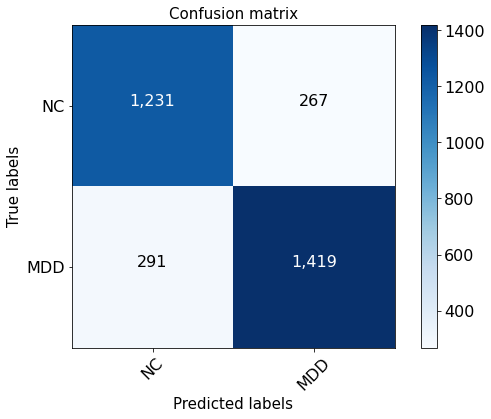

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=False):
    """
    arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions
    """
     
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j], weight='bold'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
            plt.text(0.9, 0.6, "with weight", weight="bold")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j],weight='bold'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.rcParams['font.size'] = '20'

    plt.tight_layout()
    plt.ylim(len(target_names)-0.5, -0.5)
    plt.title("Confusion matrix", fontsize=15)
    plt.ylabel('True labels', fontsize=15)
    plt.xlabel('Predicted labels', fontsize=15)
    #plt.savefig(title + '.png', dpi=500, bbox_inches = 'tight')
    plt.show()
    
    
    
# a tuple for all the class names
target_names = ('NC','MDD')
plot_confusion_matrix(cm, target_names)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [48]:
from sklearn.metrics import precision_score,recall_score,f1_score
print("Precision = " ,precision_score(y_actual, y_predicted))
print("Recall = " ,recall_score(y_actual, y_predicted))
print("F1 Score = " ,f1_score(y_actual, y_predicted))


Precision =  0.8734587929915639
Recall =  0.7871345029239766
F1 Score =  0.8280529067979083


In [43]:
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
import cv2

class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName
        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            if len(layer.output_shape) == 4:
                return layer.name
        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")


    def compute_heatmap(self, image, eps=1e-8):
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = Model(
            inputs=[self.model.inputs],
            outputs=[self.model.get_layer(self.layerName).output, self.model.output])

        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            
            loss = predictions[:, tf.argmax(predictions[0])]
    
        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)

        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads
        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))
        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")
        # return the resulting heatmap to the calling function
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
                        colormap=cv2.COLORMAP_VIRIDIS):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 124, 124, 1)       4         
_________________________________________________________________
conv2d (Conv2D)              (None, 122, 122, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 59, 59, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 111392)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               28516608  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

In [49]:
import shap

# since we have two inputs we pass a list of inputs to the explainer
explainer = shap.GradientExplainer(model,X_train)

In [50]:
shap_values = explainer.shap_values(X_test[20:24])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'


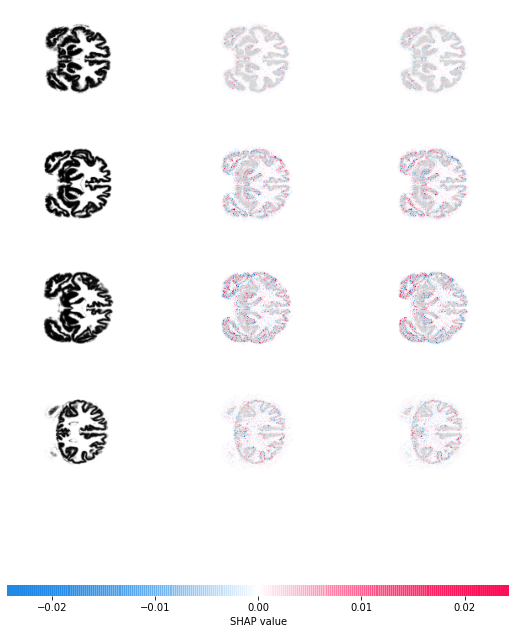

In [52]:
shap.image_plot(shap_values, -X_test[20:24])

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 124, 124, 1)       4         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 122, 122, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 64)        32832     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 128)      

C:\Users\Dell\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


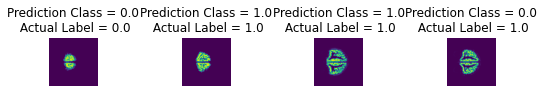

In [47]:
#to find out what input signifies
y_predicted=model.predict_classes(X_test[20:24])
y_actual=np.argmax(y_test[20:24],axis=1)
L = 1
W = 4
fig, axes = plt.subplots(L, W, figsize = (8,8))
axes = axes.ravel()
for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Prediction Class = {y_predicted[i]:0.1f}\n Actual Label = {y_actual[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=1.75)

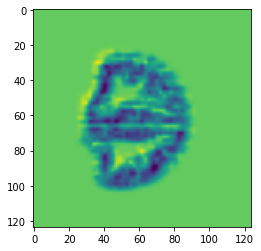

In [49]:
plt.imshow(heatmap)

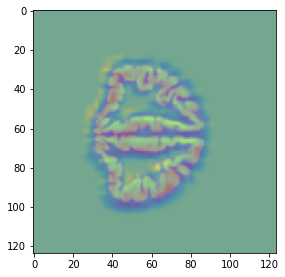

In [48]:
image = X_test[80]
image2 = cv2.resize(image, (124,124))
image2 = image2.astype('float32') / 255
image2 = np.expand_dims(image2, axis=0)
image2 = np.expand_dims(image2, axis=3)
pred = model.predict(image2) 
i = np.argmax(pred[0])
icam = GradCAM(model, i, 'conv2d_1') 
heatmap = icam.compute_heatmap(image2)
colormap = 'plasma'
fig = plt.figure(figsize=(20,20))

ax2 = plt.subplot(1, 4, 3, aspect='equal')
ax2.imshow(np.squeeze(image), alpha = 0.5, cmap='plasma')
hm = ax2.imshow(heatmap, alpha = 0.5)

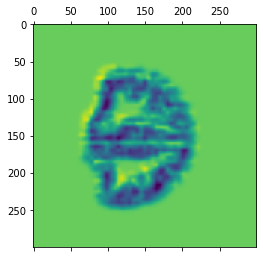

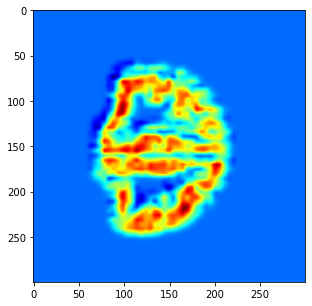

In [50]:
heatmap = cv2.resize(heatmap, (300,300))
plt.matshow(heatmap)
plt.show()
heatmapshow = None
heatmapshow = cv2.normalize(heatmap, heatmapshow, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
heatmapshow = cv2.applyColorMap(heatmapshow, cv2.COLORMAP_JET)
#cv2.imshow("Heatmap", heatmapshow)
#cv2.waitKey(0)
plt.figure(figsize = (5,5))
plt.imshow(heatmapshow)

In [59]:
heatmapshow_1 = cv2.resize(heatmapshow, (124,124))
heatmapshow_1.shape, image.shape

((124, 124, 3), (124, 124, 1))

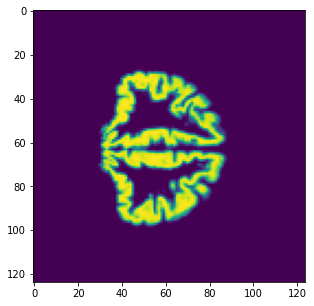

In [51]:
plt.figure(figsize = (5,5))
plt.imshow(X_test[80])

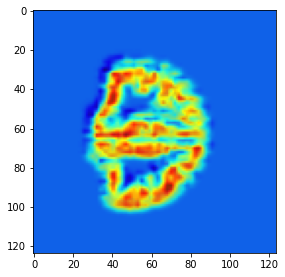

In [67]:
#colormap = 'plasma'
fig = plt.figure(figsize=(20,20))

ax2 = plt.subplot(1, 4, 3, aspect='equal')
ax2.imshow(np.squeeze(image), alpha = 0.85)#cmap='plasma'
hm = ax2.imshow(heatmapshow_1, alpha = 0.85)

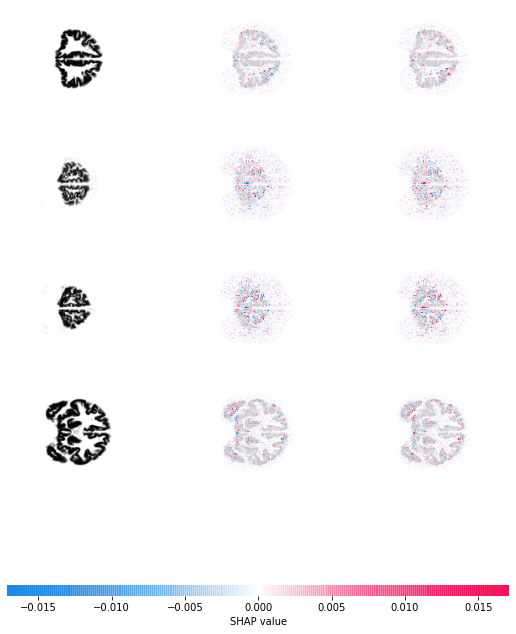

In [53]:
shap_values = explainer.shap_values(X_test[80:84])
shap.image_plot(shap_values, -X_test[80:84])

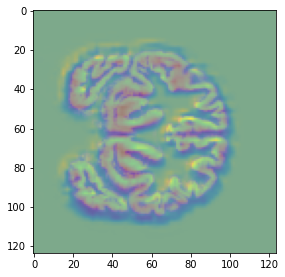

In [68]:
image3 = X_test[84]
image4 = cv2.resize(image3, (124,124))
image4 = image4.astype('float32') / 255
image4 = np.expand_dims(image4, axis=0)
image4 = np.expand_dims(image4, axis=3)
pred2 = model.predict(image4) 
i = np.argmax(pred2[0])
icam2 = GradCAM(model, i, 'conv2d_1') 
heatmap2 = icam2.compute_heatmap(image4)
colormap = 'plasma'
fig = plt.figure(figsize=(20,20))

ax2 = plt.subplot(1, 4, 3, aspect='equal')
ax2.imshow(np.squeeze(image3), alpha = 0.5, cmap='plasma')
hm = ax2.imshow(heatmap2, alpha = 0.5)

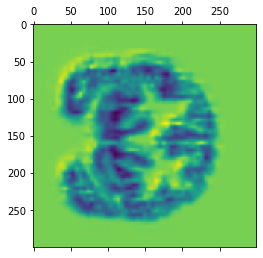

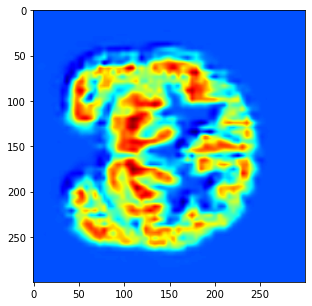

In [69]:
heatmap2 = cv2.resize(heatmap2, (300,300))
plt.matshow(heatmap2)
plt.show()
heatmapshow2 = None
heatmapshow2 = cv2.normalize(heatmap2, heatmapshow2, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
heatmapshow2 = cv2.applyColorMap(heatmapshow2, cv2.COLORMAP_JET)
#cv2.imshow("Heatmap", heatmapshow)
#cv2.waitKey(0)
plt.figure(figsize = (5,5))
plt.imshow(heatmapshow2)

In [70]:
heatmapshow_2 = cv2.resize(heatmapshow2, (124,124))
heatmapshow_2.shape, image3.shape

((124, 124, 3), (124, 124, 1))

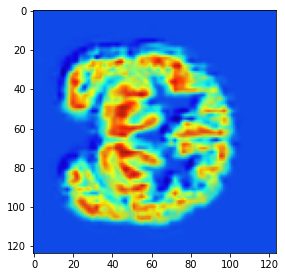

In [73]:
#colormap = 'plasma'
fig = plt.figure(figsize=(20,20))

ax2 = plt.subplot(1, 4, 3, aspect='equal')
ax2.imshow(np.squeeze(image3), alpha = 0.85)#cmap='plasma'
hm = ax2.imshow(heatmapshow_2, alpha = 0.85)

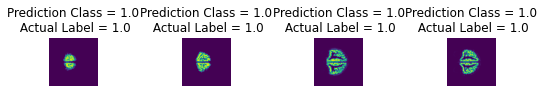

In [54]:
#to find out what input signifies
y_predicted=model.predict_classes(X_test[80:84])
y_actual=np.argmax(y_test[80:84],axis=1)
L = 1
W = 4
fig, axes = plt.subplots(L, W, figsize = (8,8))
axes = axes.ravel()
for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Prediction Class = {y_predicted[i]:0.1f}\n Actual Label = {y_actual[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=1.75)

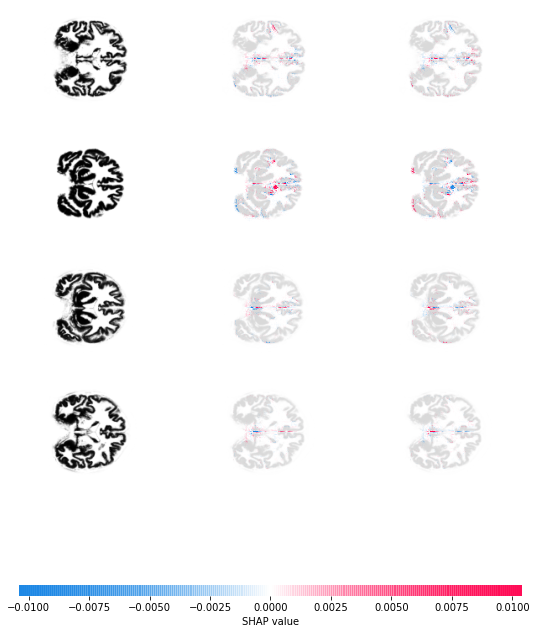

In [63]:
shap_values = explainer.shap_values(X_test[10:14])
shap.image_plot(shap_values, -X_test[10:14])